In [1]:
#Primero, realizamos la importacion de las librerias que vamos a utilizar para realizar el analisis y tratar los datos

In [1]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import prueba

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data.head()
#Con un breve vistazo a nuestros datos, vemos que tenemos una serie de variables de negocio, que a priori,
#usando la logica como punto de partida funcional, esperamos que expliquen la variabilidad del CHURN.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape
#A priori, contamos con 7043 registros (poco si hablamos de Big Data), y 21 variables
#procedemos a hacer un analisis exploratorio a nivel general para ver que tenemos

(7043, 21)

In [5]:
data.info()
#contamos con solo 3 variables cuantitativas, vamos a aplicarle una estadistica descriptiva para ver 
#como se distribuyen las variables y si son discretas o continuas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
data.describe()
# el caso de la primera de ellas SeniorCitizen, podria tratarse de una variable dummy 0/1 por lo que, revisamos
#en el caso de las otras variables, a priori vemos que tanto los meses de permanencia, como los cargas mensuales
#tienen una alta desviacion.

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.SeniorCitizen.unique()
#confirmado, se trata de una variable categorica

array([0, 1], dtype=int64)

In [8]:
#adicionalmente, parece ser que la variable TotalCharges, no esta definida como numerica, por lo que el describe()
#no la detecta automaticamente, sera interesante procesarla para darle un formato adecuado
data.TotalCharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
#antes de comenzar un analisis exploratorio, vamos a realizar un analisis de calidad del dato (DQ)

In [10]:
#1)valores nulos/vacios
#vemos que el dataset se encuentra muy limpio, bien porque el equipo de BI hace bien su trabajo y existen filtros de
# "proteccion" para que en caso de que la informacion no tenga la completitud suficiente, se descarte antes de llegar a
# capas de explotacion (obviamos que se trata de un dataset preparado para análisis)
data.isnull().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#2) Análisis de coherencia de la información, vemos que lo que recibimos es consistente
#Sólo tenemos dos generos
#Se puede ser partner o no
#En los casos de servicios vinculados a tener internet (como seguridad online, TV en streaming etc) tenemos una categoria
#para descartar los clientes que no tienen porque no han contratado internet, lo cual es interesante para analizar ese segmento
# de mercado
data.apply(set)

customerID          {6713-OKOMC, 0825-CPPQH, 8861-HGGKB, 8108-UXRQ...
gender                                                 {Male, Female}
SeniorCitizen                                                  {0, 1}
Partner                                                     {No, Yes}
Dependents                                                  {No, Yes}
tenure              {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
PhoneService                                                {No, Yes}
MultipleLines                             {No, No phone service, Yes}
InternetService                                {DSL, Fiber optic, No}
OnlineSecurity                         {No, No internet service, Yes}
OnlineBackup                           {No, No internet service, Yes}
DeviceProtection                       {No, No internet service, Yes}
TechSupport                            {No, No internet service, Yes}
StreamingTV                            {No, No internet service, Yes}
StreamingMovies     

In [12]:
#3) analisis de distribución para poder conocer los posibles outliers y entender como se distribuyen algunas variables,
# de cara a un análisis mas avanzado
data.TotalCharges.dtype
data["TotalCharges"] = data["TotalCharges"].astype(float, errors="raise")
#cuando tratamos de convertir la variable TotalCharges en int para poder trabajar con ella nos da problemas

ValueError: could not convert string to float: 

In [13]:
#esto se debe a que hay un espacios que impiden que se haga correctamente la conversion
espacios = data.TotalCharges[data.TotalCharges.str.isspace()].to_list()
espacios

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [14]:
#los espacios se encuentran en las siguientes lineas
eliminar = data.TotalCharges[data["TotalCharges"]==" "]
data.TotalCharges[data["TotalCharges"]==" "]

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [15]:
#realizamos un pequeño check, y efectivamente tenemos valores vacios que habian pasado desapercibidos a la funcion isnull
# al tratarse de espacios y ser pocos, podriamos imputarlos pero optamos por eliminarlos
data.loc[488,]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [16]:
# dropeamos los rows que tienen esos valores vacios, podriamos haberlo hecho de manera mas elegante con un for, pero por
# el escaso impacto, optamos por quitarlos "manualmente"
data = data.drop([488,753,936,1082,1340,3331,3826,4380,5218,6670,6754], 0)

In [17]:
#comprobamos que ya no hay espacioss
data.TotalCharges[data.TotalCharges.str.isspace()].to_list()

[]

In [18]:
# ya podemos transformar TotalCharges en una variable numerica con .
data["TotalCharges"] = data["TotalCharges"].astype(float, errors="raise")
data["TotalCharges"].dtype

dtype('float64')

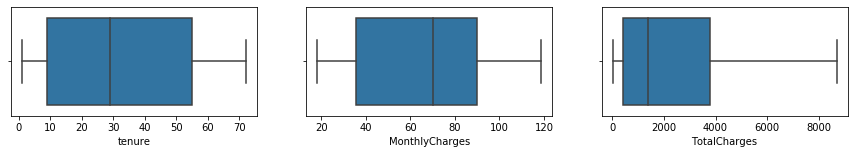

In [19]:
# analisis de distribución de para nuestras variables numericas
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)


sns.boxplot(ax=axes[0], x=data["tenure"])
sns.boxplot(ax=axes[1], x=data["MonthlyCharges"])
sns.boxplot(ax=axes[2], x=data["TotalCharges"])
#en este caso podriamos estar ante ciertos outliers en el caso de los Cargos totales, podriamos tratar de hacer un analisis
#de correlación para comprobar si los usuarios con mayor tiempo de permanencia, tienen cargos totales lo cual
#desde el punto de vista de negocio es normal, no habria que tratarlos, pero no vamos a profundizar tanto

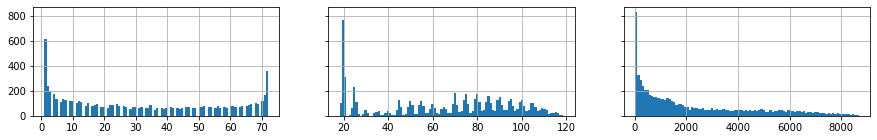

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
data["tenure"].hist(ax=axes[0],bins=100)
data["MonthlyCharges"].hist(ax=axes[1],bins=100)
data["TotalCharges"].hist(ax=axes[2],bins=100)


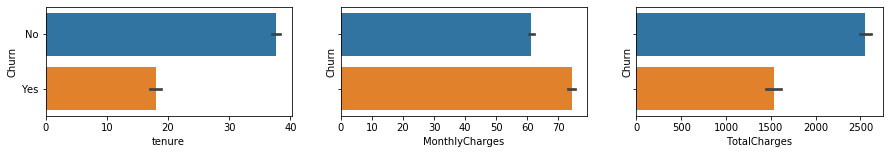

In [21]:
#Asi mismo ponemos en relacion nuestras variables numericas con el Churn, para ir viendo que variables son útiles,
# no obstante esto lo trataremos en profundidad con una matriz de correlación, o podriamos directamente utilizar una
# optimizacion bayesiana o un gridsearch para seleccionar las mejores variables
fig, axes = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
sns.barplot(ax=axes[0], x=data["tenure"], y=data["Churn"])
sns.barplot(ax=axes[1], x=data["MonthlyCharges"], y=data["Churn"])
sns.barplot(ax=axes[2], x=data["TotalCharges"], y=data["Churn"])

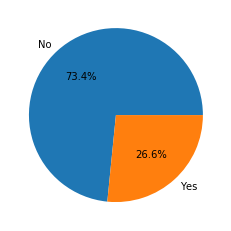

In [22]:
y=np.array(data.Churn.value_counts())
plt.pie(y, labels=data["Churn"].value_counts().keys().tolist(), autopct='%1.1f%%')
plt.show()
# vemos que unicamente el 26% de los clientes han dado de baja el servicio, quizas tendriamos un problema de inbalanceo de
# los datos, de momento no lo vamos a hacer, veremos como impacta al entrenar el modelo

In [23]:
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [24]:
# PREPROCESAMIENTO DE LAS VARIABLES ANTES DE MODELAR
# primero vamos a crear variables dummies con get_dummies (podriamos usar OneHotEncoder)

In [26]:
data_dummies = pd.get_dummies(data)

In [27]:
data_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
7039,0,72,103.20,7362.90,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7040,0,11,29.60,346.45,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7041,1,4,74.40,306.60,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [27]:
data.describe()
# Como nuestros datos cuantitativos no tienen una diferencia de escala muy sustancial (de momento no vamos a estandarizar)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
# Una vez que tenemos los datos preparados, procedemos a un análisis previo de correlación entre variables, para ver
# si a priori, tenemos variables correlacionadas entre si

In [ ]:
fig=plt.figure(figsize=(20,10))
correlation= data_dummies.corr()


In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values )